In [136]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import Imputer
import matplotlib.pyplot as plt
%matplotlib inline

In [137]:
# Load Data
hmeq_df = pd.read_csv('/data/andre_data/Open_Source_Code_Node_Projects/hmeq.csv')

In [138]:
# Preview Data
hmeq_df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [139]:
# Distribution of Good and Bad Loans
bad_count = pd.crosstab(index=hmeq_df['BAD'], columns='Count')
bad_count.index= ["Paid","Default"]
bad_count

col_0,Count
Paid,4771
Default,1189


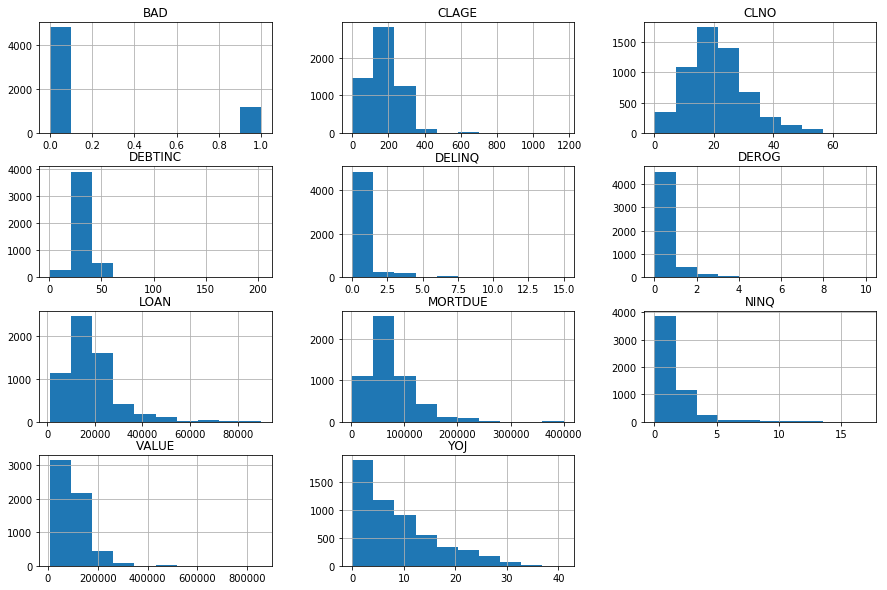

In [140]:
# View Distributions for Numeric Variables
hmeq_df.hist(figsize = (15, 10));

In [141]:
# Discretize Categorical Variables
hmeq_df = pd.get_dummies(hmeq_df)
hmeq_df.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,NaN,0,1,0,0,1,0,0,0
1,1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,NaN,0,1,0,0,1,0,0,0
2,1,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,NaN,0,1,0,0,1,0,0,0
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0
4,0,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,NaN,0,1,0,1,0,0,0,0


In [142]:
# Create our imputer to replace missing values with the mean e.g.
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp = imp.fit(hmeq_df)
hmeq_df_imp = imp.transform(hmeq_df)

In [143]:
hmeq_df_imp = hmeq_df.fillna(hmeq_df.mean())

In [144]:
# Create our imputer to replace missing values with the mean e.g.
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp = imp.fit(X_train)

# Impute our data, then train
X_train_imp = imp.transform(X_train)

In [145]:
# Create partition indicator (70/30 split)
stratification = list(StratifiedShuffleSplit(n_splits = 1,
                                             test_size = 0.3,
                                             random_state = 1234).split(hmeq_df_imp, hmeq_df_imp['BAD']))

hmeq_df_imp['_PartInd_'] = hmeq_df_imp.index.isin(stratification[0][0]).astype(int)

In [146]:
# Training Inputs
train = hmeq_df_imp[hmeq_df_imp['_PartInd_'] == 1]
X_train = train.iloc[:,1:-1]
y_train = train.iloc[:,0]

test = hmeq_df_imp[hmeq_df_imp['_PartInd_'] == 0]
X_test = train.iloc[:,1:-1]
y_test = train.iloc[:,0]

In [147]:
X_train.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
1,1300,70053.0000,68400.000000,7.000000,0.00000,2.000000,121.833333,0.000000,14.000000,33.779915,0,1,0,0,1,0,0,0
3,1500,73760.8172,101776.048741,8.922268,0.25457,0.449442,179.766275,1.186055,21.296096,33.779915,0,0,0,0,0,0,0,0
4,1700,97800.0000,112000.000000,3.000000,0.00000,0.000000,93.333333,0.000000,14.000000,33.779915,0,1,0,1,0,0,0,0
5,1700,30548.0000,40320.000000,9.000000,0.00000,0.000000,101.466002,1.000000,8.000000,37.113614,0,1,0,0,1,0,0,0
6,1800,48649.0000,57037.000000,5.000000,3.00000,2.000000,77.100000,1.000000,17.000000,33.779915,0,1,0,0,1,0,0,0


In [148]:
# Fit Gradient Boosting Model
gbc_clf = GradientBoostingClassifier(n_estimators=100,
                                    learning_rate=1.0,
                                    max_depth=1,
                                    random_state=0).fit(X_train_imp, y_train)

clf = gbc_clf.fit(X_train_imp, y_train)
clf.score(X_train_imp, y_train)

0.91395014381591566